# Textanalysis in Python - 
# Information Extraction


### Natalie Widmann



# Research Questions

- How to extract information from text?

- [ ] Who / Which pary is asking most questions
- [ ] Who receives the questions from MEP?
- [ ] What are the key references?

# Reading in data

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
path = './data/parliamentary-questions_fulltext_2023.csv'
data = pd.read_csv(path, index_col=1)

In [14]:
sample_question = data.question_text.values[100]
sample_question

'PE741.586v01-00Question for written answer E-000202/2023\nto the Commission\nRule 138\nClara Aguilera (S&D)\nSubject: The need to create a European cormorant management plan\nIn the Committee on Fisheries’ public hearing on 11 May 2022, several experts showed how \ncormorants – which have been a protected species since the 1980s – can hunt prey in such large \nquantities that entire habitats struggle to cope, and the ecosystems concerned cannot be restored.\nMore recently, during the October 2022 plenary session, a broad majority in Parliament adopted a \nresolution entitled ‘Striving for a sustainable and competitive EU aquaculture: the way forward \n(2021/2189(INI))’. In that resolution, Parliament asks the Commission to prepare a European \ncormorant management plan, since coexistence measures have proved insufficient and the growth of \ncormorant populations is causing serious damage to many marine sectors. This measure is not only \ncrucial for the sustainability of some aquacult

In [15]:
sample_answer = data.answer_text.values[110]
sample_answer

'EN\nE-000227/2023\nAnswer given by Ms Vălean\non behalf of the European Commission\n(27.3.2023)\nAs the Commission has explained in the explanatory memorandum of its proposal of \n12 September 2018 on abolishing seasonal time changes1, research indicates that the overall \nenergy savings effect of summertime is marginal, despite having been one of the main drivers \nof the current arrangements. That also means abolishing time changes should not significantly \nimpact costs of heating and electricity neither for citizens nor for businesses.\nHowever, results tend to vary depending on factors such as geographical location. That is why \nMember States are best placed to decide on whether they want to keep permanent summer- or \nwintertime should seasonal time changes be abolished, taking into account possible scenarios \nfor the choice of their permanent standard time.\nAs rightly mentioned by the Honourable Member, the Commission proposal on discontinuing \nseasonal time changes has not

# Extracting information from text

## Methods

- Based on document structure. This requires all documents to be structured exactly the same to avoid noise or wrong extractions
- Named Entity Extraction

## Extract the recipient

In [54]:
def get_recipient_from_question(question):
    recipient_text = question.split('\n')[1]
    return recipient_text.replace('to the ', '')

In [55]:
data['recipient'] = data['question_text'].apply(get_recipient_from_question)

In [56]:
data.recipient.value_counts()

Commission                                                                                  1373
Vice-President of the Commission / High Representative of the Union for Foreign Affairs       97
Council                                                                                       33
Name: recipient, dtype: int64

## Digression: Regular Expressions

Regular expressions (regex) are concise patterns used for searching and manipulating text. They are widely used in programming and text processing to match specific patterns in strings. Examples include matching email addresses ([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}) or extracting dates in the format "dd/mm/yyyy" (\d{2}/\d{2}/\d{4}).


Tools:

- RegEx Generator: https://www.autoregex.xyz/
- RegEx Online Tester: https://regexr.com/

## Extract the date of the answer submission

In [19]:
import re

date_regex = '(\d{1,2}\.\d{1,2}\.\d{4})'


In [20]:
re.findall(date_regex, sample_answer)

['27.3.2023']

In [29]:
def get_answer_date(answer):
    if not isinstance(answer, str):
        return None
    matches = re.findall(date_regex, answer)
    if len(matches) > 0:
        return matches[0]
    else:
        return None

In [30]:
data['answer_date'] = data['answer_text'].apply(get_answer_date)

In [31]:
data.answer_date.unique()

array(['15.3.2023', '6.3.2023', '13.2.2023', '11.1.2023', '10.3.2023',
       '3.3.2023', '21.2.2023', '20.2.2023', '24.2.2023', '17.3.2023',
       '17.2.2023', '16.2.2023', '14.2.2023', '28.3.2023', '28.2.2023',
       '20.3.2023', '15.2.2023', '9.3.2023', '11.4.2023', '9.2.2023',
       '3.4.2023', '13.3.2023', '14.3.2023', '16.3.2023', '27.2.2023',
       '30.3.2023', '9.1.2023', '22.2.2023', '8.1.2023', '2.3.2023',
       '24.3.2023', '1.3.2023', '17.4.2023', '22.3.2023', '12.1.2023',
       '31.3.2023', '10.1.2023', '23.3.2023', '7.3.2023', None,
       '23.1.2023', '23.2.2023', '27.3.2023', '25.1.2023', '16.1.2023',
       '24.1.2023', '18.1.2023', '21.3.2023', '21.4.2023', '13.4.2023',
       '29.3.2023', '4.4.2023', '25.4.2023', '11.5.2023', '8.3.2023',
       '19.1.2023', '31.1.2023', '7.2.2023', '23.4.2023', '30.1.2023',
       '12.4.2023', '26.1.2023', '6.2.2023', '2.2.2023', '1.2.2023',
       '27.4.2023', '3.5.2023', '27.1.2023', '18.4.2023', '14.4.2023',
       '5.4.2023

In [38]:
data[data.answer_date.isnull()]

,Unnamed: 0.1,document_identifier,document_title,document_title_en,document_type,document_parliamentary_term,document_date,document_public_register_notation,document_creator_person,document_creator_organization,...,document_doc,document_answers_pdf,document_answers_doc,document_annexes_pdf,document_annexes_doc,document_ep_number,document_URI,question_text,answer_text,answer_date
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
98,98,E-9-2023-000073,Commission confirms its support for dubious NGO,Commission confirms its support for dubious NGO,Written question,9,2023-01-11,NaN,Jean-Paul Garraud,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE741.309,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.309v01-00Question for written answer E-0...,NaN,None
99,99,E-9-2023-000017,Greek government assistance for ‘investment’ b...,Greek government assistance for ‘investment’ b...,Written question,9,2023-01-06,NaN,Stelios Kouloglou,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE741.237,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.237v01-00Question for written answer E-0...,NaN,None
198,198,E-9-2023-000148,Response to a leaked EU document on Area C,Response to a leaked EU document on Area C,Written question,9,2023-01-18,NaN,Bert-Jan Ruissen,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE741.536,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.536v02-00Question for written answer E-0...,NaN,None
199,199,E-9-2023-000171,Protests in Israel against plans to reform the...,Protests in Israel against plans to reform the...,Written question,9,2023-01-19,NaN,Hilde Vautmans,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE741.559,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.559v01-00Question for written answer E-0...,NaN,None
294,294,E-9-2023-000362,"Recovery and Resilience Facility, NextGenerati...","Recovery and Resilience Facility, NextGenerati...",Written question,9,2023-02-07,NaN,Isabel Benjumea Benjumea; José Manuel Fernande...,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE742.815,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE742.815v01-00Question for written answer E-0...,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1498,P-9-2023-001267,EU response to the Egyptian President’s order ...,EU response to the Egyptian President’s order ...,EP priority written question,9,2023-04-19,NaN,Mounir Satouri,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE747.332,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.332v01-00Priority question for written a...,NaN,None
1499,1499,P-9-2023-001146,Most efficient installations in the sectors co...,Most efficient installations in the sectors co...,EP priority written question,9,2023-04-05,NaN,Marian-Jean Marinescu,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE747.143,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.143v02-00Priority question for written a...,NaN,None
1500,1500,P-9-2023-001529,Workers’ rights in Myanmar under the MADE in M...,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,9,2023-05-10,NaN,Marianne Vind,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,NaN,NaN,PE749.414,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE749.414v01-00Priority question for written a...,NaN,None


## How long does it take till the institutions respond to a question

In [41]:
data['question_date'] = pd.to_datetime(data['document_date'])
data['answer_date'] = pd.to_datetime(data['answer_date'], dayfirst=True)

In [39]:
def compute_date_difference(start_date, end_date):
    return (end_date - start_date).days

In [47]:
data['response_time'] = data.apply(lambda row: compute_date_difference(row['question_date'], row['answer_date']), axis=1)
data['response_time']

Unnamed: 0
0        63.0
1       138.0
2        39.0
3       294.0
4       267.0
        ...  
1498      NaN
1499      NaN
1500      NaN
1501      NaN
1502      NaN
Name: response_time, Length: 1503, dtype: float64

In [48]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [57]:
data.recipient

Unnamed: 0
0                                              Commission
1                                              Commission
2       Vice-President of the Commission / High Repres...
3                                              Commission
4                                              Commission
                              ...                        
1498    Vice-President of the Commission / High Repres...
1499                                           Commission
1500                                           Commission
1501                                           Commission
1502                                           Commission
Name: recipient, Length: 1503, dtype: object

In [61]:
data['question_month'] = data['question_date'].dt.strftime('%Y-%m')

In [64]:
data.groupby('recipient')['response_time'].mean()

recipient
Commission                                                                                  58.813648
Council                                                                                     69.000000
Vice-President of the Commission / High Representative of the Union for Foreign Affairs     55.880597
Name: response_time, dtype: float64

In [65]:
data.groupby('question_month')['response_time'].mean()

question_month
2023-01    73.487365
2023-02    53.643293
2023-03    48.556561
2023-04    41.583333
2023-05          NaN
Name: response_time, dtype: float64

In [66]:
data

,Unnamed: 0.1,document_identifier,document_title,document_title_en,document_type,document_parliamentary_term,document_date,document_public_register_notation,document_creator_person,document_creator_organization,...,document_ep_number,document_URI,question_text,answer_text,answer_date,question_date,Response_Time,response_time,recipient,question_month
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,E-9-2023-000080,Suspension of the payment of funds to Morocco ...,Suspension of the payment of funds to Morocco ...,Written question,9,2023-01-11,NaN,Gianantonio Da Re,NaN,...,PE741.317,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.317v01-00Question for written answer E-0...,EN\nE-000080/2023\nAnswer given by Mr Várhelyi...,2023-03-15,2023-01-11,63.0,63.0,Commission,2023-01
1,1,E-9-2023-000114,Shortage of medicines in Greece and the EU,Shortage of medicines in Greece and the EU,Written question,9,2023-01-16,NaN,Lefteris Nikolaou-Alavanos,NaN,...,PE741.347,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.347v01-00Question for written answer E-0...,EN\nE-000114/2023\nAnswer given by Ms Kyriakid...,2023-06-03,2023-01-16,138.0,138.0,Commission,2023-01
2,2,E-9-2023-000012,Declaration of the state of emergency in Peru ...,Declaration of the state of emergency in Peru ...,Written question,9,2023-01-05,NaN,Manu Pineda,NaN,...,PE741.232,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.232v01-00Question for written answer E-0...,EN\nE-000012/2023\nAnswer given by High Repres...,2023-02-13,2023-01-05,39.0,39.0,Vice-President of the Commission / High Repres...,2023-01
3,3,E-9-2023-000074,Shortage of medicines,Shortage of medicines,Written question,9,2023-01-11,NaN,Maria Spyraki,NaN,...,PE741.310,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.310v01-00Question for written answer E-0...,(English version)\nQuestion for written answer...,2023-11-01,2023-01-11,294.0,294.0,Commission,2023-01
4,4,E-9-2023-000034,Emergency interventions to address high energy...,Emergency interventions to address high energy...,Written question,9,2023-01-09,NaN,Cristian-Silviu Buşoi,NaN,...,PE741.254,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.254v01-00Question for written answer E-0...,EN\nE-000034/2023\nAnswer given by Ms Simson\n...,2023-10-03,2023-01-09,267.0,267.0,Commission,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1498,P-9-2023-001267,EU response to the Egyptian President’s order ...,EU response to the Egyptian President’s order ...,EP priority written question,9,2023-04-19,NaN,Mounir Satouri,NaN,...,PE747.332,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.332v01-00Priority question for written a...,NaN,NaT,2023-04-19,NaN,NaN,Vice-President of the Commission / High Repres...,2023-04
1499,1499,P-9-2023-001146,Most efficient installations in the sectors co...,Most efficient installations in the sectors co...,EP priority written question,9,2023-04-05,NaN,Marian-Jean Marinescu,NaN,...,PE747.143,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.143v02-00Priority question for written a...,NaN,NaT,2023-04-05,NaN,NaN,Commission,2023-04
1500,1500,P-9-2023-001529,Workers’ rights in Myanmar under the MADE in M...,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,9,2023-05-10,NaN,Marianne Vind,NaN,...,PE749.414,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE749.414v01-00Priority question for written a...,NaN,NaT,2023-05-10,NaN,NaN,Commission,2023-05


/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/natalie/.local/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


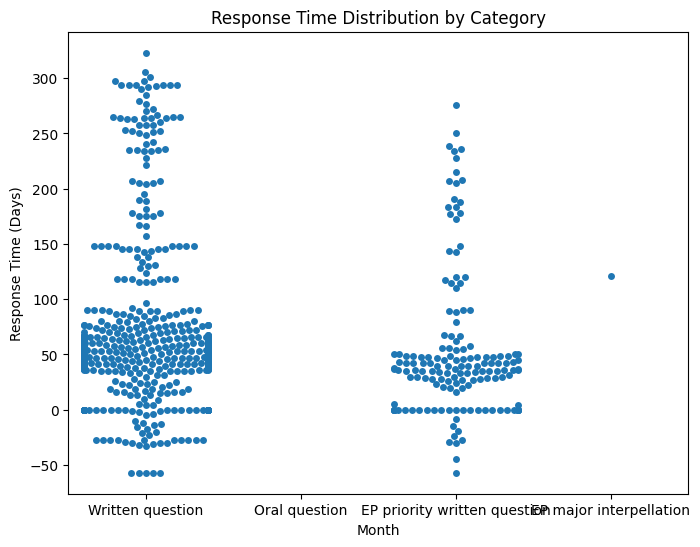

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.swarmplot(x='document_type', y='response_time', data=data)
plt.xlabel('Month')
plt.ylabel('Response Time (Days)')
plt.title('Response Time Distribution by Category')
plt.show()

## Extract the party

In [105]:
import re
party_pattern = r"\((.*?)\)"

def get_parties(question):
    party_text = question.split('\n')[3]
    matches = re.findall(party_pattern, party_text)
    if matches:
        return list(set(matches))         # only return the unique parties per parliamentary question
    else:
        return None

In [106]:
data['parties'] = data['question_text'].apply(get_parties)

In [107]:
data.parties

0             [ID]
1             [NI]
2             None
3            [PPE]
4            [PPE]
           ...    
1498          None
1499         [PPE]
1500         [S&D]
1501          [ID]
1502    [The Left]
Name: parties, Length: 1503, dtype: object

### Problem: None Values as the structure of the documents is not exactly the same

In [118]:
print(data[data.parties.isnull()].answer_text.values[0])

EN
E-000012/2023
Answer given by High Representative/Vice-President Borrell i Fontelles
on behalf of the European Commission
(13.2.2023)
Since the impeachment of former President of Peru, Pedro Castillo, on 7 December 2022, the 
EU issued three local statements1 and three Spokesperson statements2 calling for a peaceful 
and democratic political solution to the current crisis in a spirit of dialogue and cooperation 
between political parties and civil society. The EU condemned any use of violence by 
demonstrators as well as the disproportionate use of force by the forces of law and order and 
called for their investigation. In this sense, it welcomed the current work carried out by the 
Inter American Court of Human Rights (IACHR), which should soon present its conclusions. 
The EU trusts that the IACHR work will contribute to the clarification of the tragic loss of life 
since 7 December 2022 in Peru and to prevent similar events in the future.
Supporting the enforcement of human righ

## Named Entity Recognition

In [127]:
!pip install spacy
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [128]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    named_entities = []

    for entity in doc.ents:
        if entity.label_ in ["DATE", "PERSON", "ORG"]:
            named_entities.append((entity.text, entity.label_))

    return named_entities

In [131]:
sample_question

'PE741.317v01-00Question for written answer E-000080/2023\nto the Commission\nRule 138\nGianantonio Da Re (ID)\nSubject: Suspension of the payment of funds to Morocco pending the completion of investigations \ninto the ‘Qatargate’ financial scandal \nAt a press conference held on 5 January 2023, the Vice-President of the Commission / High \nRepresentative of the Union for Foreign Affairs and Security Policy, Josep Borrell, and the Moroccan \nMinister for Foreign Affairs, Nasser Bourita, announced that EU-Morocco relations were to be \nstrengthened. Apart from the financing agreements worth almost EUR 500 million already envisaged \nfor 2022/2023, Morocco is due to receive EUR 1.6 billion from the EU over the period 2021-2027, \nwhich is the most of any country in the region. According to Mr Bourita, the partnership between the \nEU and Morocco has three dimensions: neighbourhood, values and interests. Besides this, the EU \nVice-President / High Representative announced the launch of t

In [132]:
sample_answer

'EN\nE-000101/2023\nAnswer given by Mr Sinkevičius\non behalf of the European Commission\n(17.3.2023)\n1. The EU Timber Regulation (EUTR)1 prohibits the placement on the EU market of illegally \nharvested timber and derived products. The Regulation on deforestation and forest \ndegradation2 will ban the placing on the EU market or the export of products issued from land \ndeforested or degraded after 2020, or produced illegally. The Habitats and the Birds \nDirectives3 establish rules on species and sites protection and management, which are \nrelevant for forestry activities. Specifically, when it comes to energy, the Renewable Energy \nDirective (RED)4 sets sustainability criteria for biofuels, bioliquids and biomass fuels, with \nthe aim to ensure that forest biomass used for energy is sourced sustainably, and to minimise \nthe risks, in terms of carbon sinks and stocks and biodiversity.\n2. The EU Forest Strategy for 20305 underlines that forests are paramount for the \nachievement

In [134]:
extract_named_entities(sample_answer)

[('Sinkevičius', 'PERSON'),
 ('the European Commission', 'ORG'),
 ('EU', 'ORG'),
 ('EU', 'ORG'),
 ('EU', 'ORG'),
 ('2020', 'DATE'),
 ('Habitats', 'PERSON'),
 ('Birds', 'ORG'),
 ('the Renewable Energy \nDirective', 'ORG'),
 ('EU', 'ORG'),
 ('20305', 'DATE'),
 ('EU', 'ORG'),
 ('2050', 'DATE'),
 ('EU', 'ORG'),
 ('the last decade', 'DATE'),
 ('required7', 'PERSON'),
 ('forestry8', 'ORG'),
 ('EU', 'ORG'),
 ('the European Parliament', 'ORG'),
 ('the Council of 20', 'ORG'),
 ('October 2010', 'DATE'),
 ('12.11.2010', 'DATE'),
 ('https://environment.ec.europa.eu/publications/proposal-regulation-deforestation-free-products_en',
  'ORG'),
 ('Council Directive', 'ORG'),
 ('92/43/EEC', 'ORG'),
 ('22.7.1992', 'DATE'),
 ('EC', 'ORG'),
 ('OJ L 20', 'ORG'),
 ('EU', 'ORG'),
 ('2018/2001', 'DATE'),
 ('the European Parliament', 'ORG'),
 ('the Council of 11 December 2018', 'ORG'),
 ('OJ L 328', 'ORG'),
 ('21.12.2018', 'DATE'),
 ('the Swedish Environmental Protection Agency', 'ORG'),
 ('Swedish Forest Agenc

In [108]:
exploded_data = data.explode('parties')

# Count the number of requests issued by each party
party_counts = exploded_data['parties'].value_counts()

print(party_counts)


ID           299
PPE          253
S&D          194
The Left     185
Verts/ALE    166
Renew        154
ECR          136
NI            87
Name: parties, dtype: int64


In [103]:
len(exploded_data)

1981

In [101]:
data

,Unnamed: 0.1,Unnamed: 0,document_identifier,document_title,document_type,document_parliamentary_term,document_date,document_public_register_notation,document_creator_person,document_creator_organization,...,document_answers_doc,document_annexes_pdf,document_annexes_doc,document_ep_number,document_URI,question_text,answer_text,recipient,word_count,parties
0,0,0,E-9-2023-000080,Suspension of the payment of funds to Morocco ...,Written question,9,2023-01-11,NaN,Gianantonio Da Re,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.317,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.317v01-00Question for written answer E-0...,EN\nE-000080/2023\nAnswer given by Mr Várhelyi...,Commission,232.0,[ID]
1,1,1,E-9-2023-000114,Shortage of medicines in Greece and the EU,Written question,9,2023-01-16,NaN,Lefteris Nikolaou-Alavanos,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.347,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.347v01-00Question for written answer E-0...,EN\nE-000114/2023\nAnswer given by Ms Kyriakid...,Commission,232.0,[NI]
2,2,2,E-9-2023-000012,Declaration of the state of emergency in Peru ...,Written question,9,2023-01-05,NaN,Manu Pineda,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.232,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.232v01-00Question for written answer E-0...,EN\nE-000012/2023\nAnswer given by High Repres...,Vice-President of the Commission / High Repres...,208.0,None
3,3,3,E-9-2023-000074,Shortage of medicines,Written question,9,2023-01-11,NaN,Maria Spyraki,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.310,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.310v01-00Question for written answer E-0...,(English version)\nQuestion for written answer...,Commission,369.0,[PPE]
4,4,4,E-9-2023-000034,Emergency interventions to address high energy...,Written question,9,2023-01-09,NaN,Cristian-Silviu Buşoi,NaN,...,https://data.europarl.europa.eu/distribution/r...,NaN,NaN,PE741.254,https://data.europarl.europa.eu/eli/dl/doc/E-9...,PE741.254v01-00Question for written answer E-0...,EN\nE-000034/2023\nAnswer given by Ms Simson\n...,Commission,378.0,[PPE]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1498,1498,P-9-2023-001267,EU response to the Egyptian President’s order ...,EP priority written question,9,2023-04-19,NaN,Mounir Satouri,NaN,...,NaN,NaN,NaN,PE747.332,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.332v01-00Priority question for written a...,NaN,Vice-President of the Commission / High Repres...,NaN,None
1499,1499,1499,P-9-2023-001146,Most efficient installations in the sectors co...,EP priority written question,9,2023-04-05,NaN,Marian-Jean Marinescu,NaN,...,NaN,NaN,NaN,PE747.143,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE747.143v02-00Priority question for written a...,NaN,Commission,NaN,[PPE]
1500,1500,1500,P-9-2023-001529,Workers’ rights in Myanmar under the MADE in M...,EP priority written question,9,2023-05-10,NaN,Marianne Vind,NaN,...,NaN,NaN,NaN,PE749.414,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE749.414v01-00Priority question for written a...,NaN,Commission,NaN,[S&D]
1501,1501,1501,P-9-2023-001534,The European institution’s support of Islamist...,EP priority written question,9,2023-05-09,NaN,Marie Dauchy; André Rougé; Hermann Tertsch; Jo...,NaN,...,NaN,NaN,NaN,PE749.419,https://data.europarl.europa.eu/eli/dl/doc/P-9...,PE749.419v01-00Priority question for written a...,NaN,Commission,NaN,"[ID, ID, ID, ID]"
